In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

%matplotlib inline

heart_df = pd.read_csv(r"D:\Data sets\Heart Disease\Heart_diseas\heart_statlog_cleveland_hungary_final.csv")

heart_df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# check heart_data Size

In [2]:
heart_df.shape

(1190, 12)

# Heart_Data Summary

In [3]:
heart_df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# Make Age_group from The Age

In [4]:
bins = [ 19, 35, 59, 150]

labels = [ "Youngster", "Adult", "Senior Citizen"]

heart_df["Age_Group"] = pd.cut(heart_df["age"],bins = bins,labels=labels,right = True)

heart_df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,Age_Group
0,40,1,2,140,289,0,0,172,0,0.0,1,0,Adult
1,49,0,3,160,180,0,0,156,0,1.0,2,1,Adult
2,37,1,2,130,283,0,1,98,0,0.0,1,0,Adult
3,48,0,4,138,214,0,0,108,1,1.5,2,1,Adult
4,54,1,3,150,195,0,0,122,0,0.0,1,0,Adult


# Categorize Chest pain From Chest_pain_type

In [5]:
def format_chestpain_type(i):
    if i == 1:
        return "Typical angina"
    
    elif i == 2 :
        return "Atypical angina"
    
    elif i == 3 :
        return " Non-anginal pain"
    
    elif i == 4 :
        return  "Asymptomatic"
    

heart_df["Chest_pain_type"] = heart_df["chest pain type"].apply(format_chestpain_type)
heart_df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,Age_Group,Chest_pain_type
0,40,1,2,140,289,0,0,172,0,0.0,1,0,Adult,Atypical angina
1,49,0,3,160,180,0,0,156,0,1.0,2,1,Adult,Non-anginal pain
2,37,1,2,130,283,0,1,98,0,0.0,1,0,Adult,Atypical angina
3,48,0,4,138,214,0,0,108,1,1.5,2,1,Adult,Asymptomatic
4,54,1,3,150,195,0,0,122,0,0.0,1,0,Adult,Non-anginal pain


# Find Gender From sex

In [6]:
def format_gender(i):
    if i == 1:
        return "Male"
    else:
        return "Female"
    

heart_df["Gender"] = heart_df["sex"].apply(format_gender)
heart_df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,Age_Group,Chest_pain_type,Gender
0,40,1,2,140,289,0,0,172,0,0.0,1,0,Adult,Atypical angina,Male
1,49,0,3,160,180,0,0,156,0,1.0,2,1,Adult,Non-anginal pain,Female
2,37,1,2,130,283,0,1,98,0,0.0,1,0,Adult,Atypical angina,Male
3,48,0,4,138,214,0,0,108,1,1.5,2,1,Adult,Asymptomatic,Female
4,54,1,3,150,195,0,0,122,0,0.0,1,0,Adult,Non-anginal pain,Male


# Find resting ecg type From resting ecg

In [7]:
def format_ecg(i):
    if i == 0:
        return "Normal ECG"
    
    elif i == 1:
        return "Reduced blood supply"
    
    elif i ==2:
        return "Thickened left ventricle"
    

heart_df["ECG_Type"] = heart_df["resting ecg"].apply(format_ecg)
heart_df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,Age_Group,Chest_pain_type,Gender,ECG_Type
0,40,1,2,140,289,0,0,172,0,0.0,1,0,Adult,Atypical angina,Male,Normal ECG
1,49,0,3,160,180,0,0,156,0,1.0,2,1,Adult,Non-anginal pain,Female,Normal ECG
2,37,1,2,130,283,0,1,98,0,0.0,1,0,Adult,Atypical angina,Male,Reduced blood supply
3,48,0,4,138,214,0,0,108,1,1.5,2,1,Adult,Asymptomatic,Female,Normal ECG
4,54,1,3,150,195,0,0,122,0,0.0,1,0,Adult,Non-anginal pain,Male,Normal ECG


# Find Fasting Blood Sugar status

In [8]:
def convert_fas_blood_sugar(i):
    if i == 1:
        return "True"
    else:
        return "False"
    

heart_df["Fasting_Blood_Sugar"] = heart_df["fasting blood sugar"].apply(convert_fas_blood_sugar)

heart_df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,Age_Group,Chest_pain_type,Gender,ECG_Type,Fasting_Blood_Sugar
0,40,1,2,140,289,0,0,172,0,0.0,1,0,Adult,Atypical angina,Male,Normal ECG,False
1,49,0,3,160,180,0,0,156,0,1.0,2,1,Adult,Non-anginal pain,Female,Normal ECG,False
2,37,1,2,130,283,0,1,98,0,0.0,1,0,Adult,Atypical angina,Male,Reduced blood supply,False
3,48,0,4,138,214,0,0,108,1,1.5,2,1,Adult,Asymptomatic,Female,Normal ECG,False
4,54,1,3,150,195,0,0,122,0,0.0,1,0,Adult,Non-anginal pain,Male,Normal ECG,False


# Find Chest Pain during exercise 

In [9]:
def exercise_angina(i):
    if i == 1:
        return "Yes"
    else:
        return "No"
    

heart_df["Exercise_angina"] = heart_df["exercise angina"].apply(exercise_angina)
heart_df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,Age_Group,Chest_pain_type,Gender,ECG_Type,Fasting_Blood_Sugar,Exercise_angina
0,40,1,2,140,289,0,0,172,0,0.0,1,0,Adult,Atypical angina,Male,Normal ECG,False,No
1,49,0,3,160,180,0,0,156,0,1.0,2,1,Adult,Non-anginal pain,Female,Normal ECG,False,No
2,37,1,2,130,283,0,1,98,0,0.0,1,0,Adult,Atypical angina,Male,Reduced blood supply,False,No
3,48,0,4,138,214,0,0,108,1,1.5,2,1,Adult,Asymptomatic,Female,Normal ECG,False,Yes
4,54,1,3,150,195,0,0,122,0,0.0,1,0,Adult,Non-anginal pain,Male,Normal ECG,False,No


# Find ST slope Type From ST slope

In [10]:
def st_slope_type(i):
    if i == 1:
        return "upsloping"
    
    elif i == 2:
        return "flat"
    
    elif i == 3:
        return "downsloping"
    
    else:
        return "normal"
    

heart_df["ST_Slope"] = heart_df["ST slope"].apply(st_slope_type)
heart_df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,Age_Group,Chest_pain_type,Gender,ECG_Type,Fasting_Blood_Sugar,Exercise_angina,ST_Slope
0,40,1,2,140,289,0,0,172,0,0.0,1,0,Adult,Atypical angina,Male,Normal ECG,False,No,upsloping
1,49,0,3,160,180,0,0,156,0,1.0,2,1,Adult,Non-anginal pain,Female,Normal ECG,False,No,flat
2,37,1,2,130,283,0,1,98,0,0.0,1,0,Adult,Atypical angina,Male,Reduced blood supply,False,No,upsloping
3,48,0,4,138,214,0,0,108,1,1.5,2,1,Adult,Asymptomatic,Female,Normal ECG,False,Yes,flat
4,54,1,3,150,195,0,0,122,0,0.0,1,0,Adult,Non-anginal pain,Male,Normal ECG,False,No,upsloping


# Data Visulization

C:\Users\Admin\AppData\Local\Temp\ipykernel_14912\1885012245.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_group = heart_df.groupby(heart_df["Age_Group"])["target"].sum()


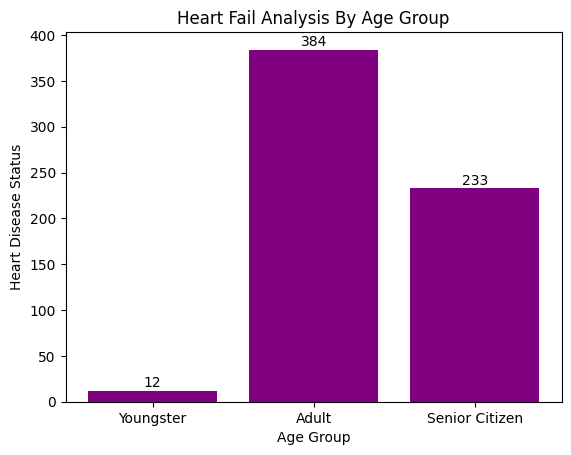

In [11]:
Age_group = heart_df.groupby(heart_df["Age_Group"])["target"].sum()

plt.bar(Age_group.index,Age_group.values,color = "purple")

plt.xlabel("Age Group")

plt.ylabel("Heart Disease Status")

plt.title("Heart Fail Analysis By Age Group")

for i,value in enumerate(Age_group.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

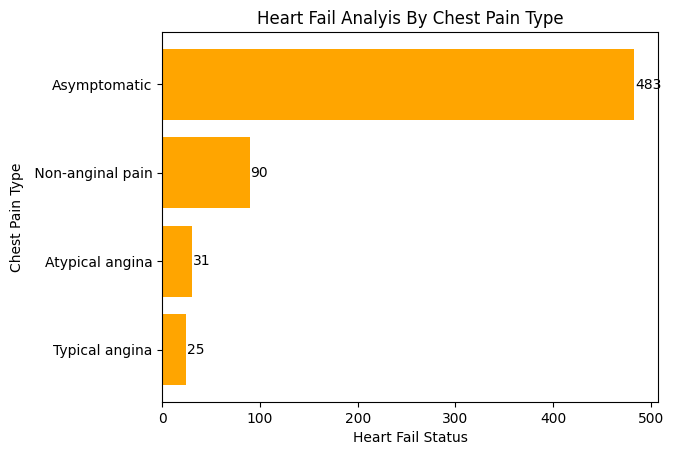

In [12]:
Chest_pain_type_group = heart_df.groupby(heart_df["Chest_pain_type"])["target"].sum().sort_values(ascending=True).head(4)

plt.barh(Chest_pain_type_group.index,Chest_pain_type_group.values,color = "orange")

plt.xlabel("Heart Fail Status")

plt.ylabel("Chest Pain Type")

plt.title("Heart Fail Analyis By Chest Pain Type")

for i,value in enumerate(Chest_pain_type_group.values):
    plt.text(value + 0.5, i, str(value), va='center', fontsize=10)

plt.show()

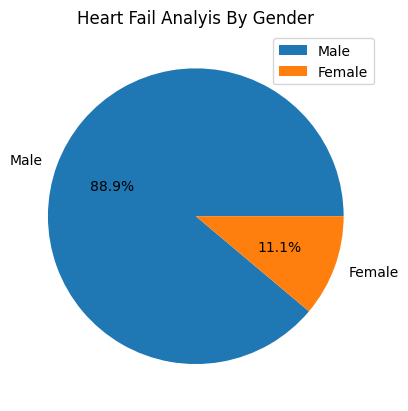

In [13]:
Gender_group = heart_df.groupby(heart_df["Gender"])["target"].sum().sort_values(ascending=False).head(2)

plt.pie(Gender_group.values,labels=Gender_group.index,autopct='%1.1f%%')

plt.legend()

plt.title("Heart Fail Analyis By Gender")

plt.show()

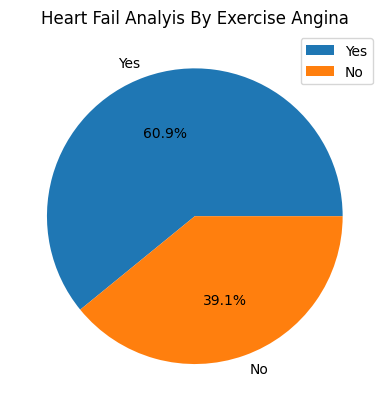

In [14]:
exercise_group = heart_df.groupby(heart_df["Exercise_angina"])["target"].sum().sort_values(ascending=False).head(2)

plt.pie(exercise_group.values,labels=exercise_group.index,autopct='%1.1f%%')

plt.legend()

plt.title("Heart Fail Analyis By Exercise Angina")

plt.show()

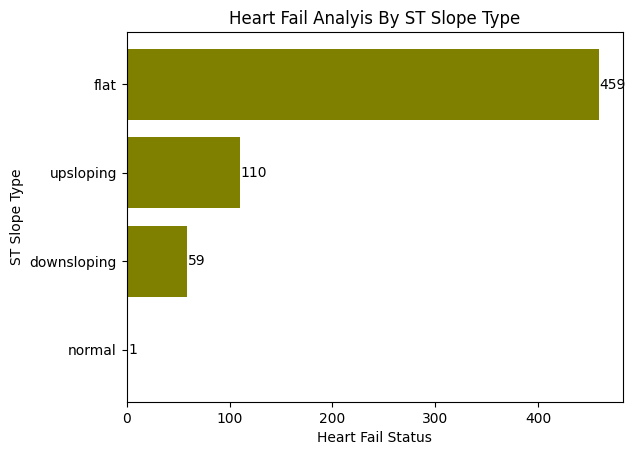

In [15]:
st_type_group = heart_df.groupby(heart_df["ST_Slope"])["target"].sum().sort_values(ascending=True).head(4)

plt.barh(st_type_group.index,st_type_group.values,color = "olive")

plt.xlabel("Heart Fail Status")

plt.ylabel("ST Slope Type")

plt.title("Heart Fail Analyis By ST Slope Type")

for i,value in enumerate(st_type_group.values):
    plt.text(value + 0.5, i, str(value), va='center', fontsize=10)

plt.show()

# Check NA and Missing Values

In [16]:
heart_df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
Age_Group              0
Chest_pain_type        0
Gender                 0
ECG_Type               0
Fasting_Blood_Sugar    0
Exercise_angina        0
ST_Slope               0
dtype: int64

# One Hot encoding

In [17]:
heart_df1 = heart_df.copy()
heart_df1.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,Age_Group,Chest_pain_type,Gender,ECG_Type,Fasting_Blood_Sugar,Exercise_angina,ST_Slope
0,40,1,2,140,289,0,0,172,0,0.0,1,0,Adult,Atypical angina,Male,Normal ECG,False,No,upsloping
1,49,0,3,160,180,0,0,156,0,1.0,2,1,Adult,Non-anginal pain,Female,Normal ECG,False,No,flat
2,37,1,2,130,283,0,1,98,0,0.0,1,0,Adult,Atypical angina,Male,Reduced blood supply,False,No,upsloping
3,48,0,4,138,214,0,0,108,1,1.5,2,1,Adult,Asymptomatic,Female,Normal ECG,False,Yes,flat
4,54,1,3,150,195,0,0,122,0,0.0,1,0,Adult,Non-anginal pain,Male,Normal ECG,False,No,upsloping


In [18]:
heart_df1["Fasting_Blood_Sugar"] = heart_df1["Fasting_Blood_Sugar"].replace({"True":1,"False":0})
heart_df1["Exercise_angina"] = heart_df1["Exercise_angina"].replace({"Yes":1,"No":0})

heart_df1.head(5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14912\603403915.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_df1["Fasting_Blood_Sugar"] = heart_df1["Fasting_Blood_Sugar"].replace({"True":1,"False":0})
C:\Users\Admin\AppData\Local\Temp\ipykernel_14912\603403915.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_df1["Exercise_angina"] = heart_df1["Exercise_angina"].replace({"Yes":1,"No":0})


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,Age_Group,Chest_pain_type,Gender,ECG_Type,Fasting_Blood_Sugar,Exercise_angina,ST_Slope
0,40,1,2,140,289,0,0,172,0,0.0,1,0,Adult,Atypical angina,Male,Normal ECG,0,0,upsloping
1,49,0,3,160,180,0,0,156,0,1.0,2,1,Adult,Non-anginal pain,Female,Normal ECG,0,0,flat
2,37,1,2,130,283,0,1,98,0,0.0,1,0,Adult,Atypical angina,Male,Reduced blood supply,0,0,upsloping
3,48,0,4,138,214,0,0,108,1,1.5,2,1,Adult,Asymptomatic,Female,Normal ECG,0,1,flat
4,54,1,3,150,195,0,0,122,0,0.0,1,0,Adult,Non-anginal pain,Male,Normal ECG,0,0,upsloping


In [19]:
Age_group_dummy = pd.get_dummies(heart_df1["Age_Group"]).astype(int)
Age_group_dummy

,Youngster,Adult,Senior Citizen
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1185,0,1,0
1186,0,0,1
1187,0,1,0
1188,0,1,0


In [20]:
heart_df2 = pd.concat([heart_df1,Age_group_dummy],axis=1)
heart_df2.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,Age_Group,Chest_pain_type,Gender,ECG_Type,Fasting_Blood_Sugar,Exercise_angina,ST_Slope,Youngster,Adult,Senior Citizen
0,40,1,2,140,289,0,0,172,0,0.0,...,Adult,Atypical angina,Male,Normal ECG,0,0,upsloping,0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,...,Adult,Non-anginal pain,Female,Normal ECG,0,0,flat,0,1,0
2,37,1,2,130,283,0,1,98,0,0.0,...,Adult,Atypical angina,Male,Reduced blood supply,0,0,upsloping,0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,...,Adult,Asymptomatic,Female,Normal ECG,0,1,flat,0,1,0
4,54,1,3,150,195,0,0,122,0,0.0,...,Adult,Non-anginal pain,Male,Normal ECG,0,0,upsloping,0,1,0


In [21]:
heart_df3 = heart_df2.copy()
heart_df3

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,Age_Group,Chest_pain_type,Gender,ECG_Type,Fasting_Blood_Sugar,Exercise_angina,ST_Slope,Youngster,Adult,Senior Citizen
0,40,1,2,140,289,0,0,172,0,0.0,...,Adult,Atypical angina,Male,Normal ECG,0,0,upsloping,0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,...,Adult,Non-anginal pain,Female,Normal ECG,0,0,flat,0,1,0
2,37,1,2,130,283,0,1,98,0,0.0,...,Adult,Atypical angina,Male,Reduced blood supply,0,0,upsloping,0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,...,Adult,Asymptomatic,Female,Normal ECG,0,1,flat,0,1,0
4,54,1,3,150,195,0,0,122,0,0.0,...,Adult,Non-anginal pain,Male,Normal ECG,0,0,upsloping,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,...,Adult,Typical angina,Male,Normal ECG,0,0,flat,0,1,0
1186,68,1,4,144,193,1,0,141,0,3.4,...,Senior Citizen,Asymptomatic,Male,Normal ECG,1,0,flat,0,0,1
1187,57,1,4,130,131,0,0,115,1,1.2,...,Adult,Asymptomatic,Male,Normal ECG,0,1,flat,0,1,0
1188,57,0,2,130,236,0,2,174,0,0.0,...,Adult,Atypical angina,Female,Thickened left ventricle,0,0,flat,0,1,0


In [22]:
Gender_dummy = pd.get_dummies(heart_df3["Gender"]).astype(int)
Gender_dummy

,Female,Male
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
1185,0,1
1186,0,1
1187,0,1
1188,1,0


In [23]:
heart_df4 = pd.concat([heart_df3,Gender_dummy],axis=1)
heart_df4.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,Gender,ECG_Type,Fasting_Blood_Sugar,Exercise_angina,ST_Slope,Youngster,Adult,Senior Citizen,Female,Male
0,40,1,2,140,289,0,0,172,0,0.0,...,Male,Normal ECG,0,0,upsloping,0,1,0,0,1
1,49,0,3,160,180,0,0,156,0,1.0,...,Female,Normal ECG,0,0,flat,0,1,0,1,0
2,37,1,2,130,283,0,1,98,0,0.0,...,Male,Reduced blood supply,0,0,upsloping,0,1,0,0,1
3,48,0,4,138,214,0,0,108,1,1.5,...,Female,Normal ECG,0,1,flat,0,1,0,1,0
4,54,1,3,150,195,0,0,122,0,0.0,...,Male,Normal ECG,0,0,upsloping,0,1,0,0,1


In [24]:
heart_df5 = heart_df4.copy()
heart_df5.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,Gender,ECG_Type,Fasting_Blood_Sugar,Exercise_angina,ST_Slope,Youngster,Adult,Senior Citizen,Female,Male
0,40,1,2,140,289,0,0,172,0,0.0,...,Male,Normal ECG,0,0,upsloping,0,1,0,0,1
1,49,0,3,160,180,0,0,156,0,1.0,...,Female,Normal ECG,0,0,flat,0,1,0,1,0
2,37,1,2,130,283,0,1,98,0,0.0,...,Male,Reduced blood supply,0,0,upsloping,0,1,0,0,1
3,48,0,4,138,214,0,0,108,1,1.5,...,Female,Normal ECG,0,1,flat,0,1,0,1,0
4,54,1,3,150,195,0,0,122,0,0.0,...,Male,Normal ECG,0,0,upsloping,0,1,0,0,1


In [25]:
ECG_dummy = pd.get_dummies(heart_df5["ECG_Type"]).astype(int)
ECG_dummy

,Normal ECG,Reduced blood supply,Thickened left ventricle
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1185,1,0,0
1186,1,0,0
1187,1,0,0
1188,0,0,1


In [26]:
heart_df6 = pd.concat([heart_df5,ECG_dummy],axis=1)
heart_df6.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,Exercise_angina,ST_Slope,Youngster,Adult,Senior Citizen,Female,Male,Normal ECG,Reduced blood supply,Thickened left ventricle
0,40,1,2,140,289,0,0,172,0,0.0,...,0,upsloping,0,1,0,0,1,1,0,0
1,49,0,3,160,180,0,0,156,0,1.0,...,0,flat,0,1,0,1,0,1,0,0
2,37,1,2,130,283,0,1,98,0,0.0,...,0,upsloping,0,1,0,0,1,0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,...,1,flat,0,1,0,1,0,1,0,0
4,54,1,3,150,195,0,0,122,0,0.0,...,0,upsloping,0,1,0,0,1,1,0,0


In [27]:
heart_df7 = heart_df6.copy()
heart_df7.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,Exercise_angina,ST_Slope,Youngster,Adult,Senior Citizen,Female,Male,Normal ECG,Reduced blood supply,Thickened left ventricle
0,40,1,2,140,289,0,0,172,0,0.0,...,0,upsloping,0,1,0,0,1,1,0,0
1,49,0,3,160,180,0,0,156,0,1.0,...,0,flat,0,1,0,1,0,1,0,0
2,37,1,2,130,283,0,1,98,0,0.0,...,0,upsloping,0,1,0,0,1,0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,...,1,flat,0,1,0,1,0,1,0,0
4,54,1,3,150,195,0,0,122,0,0.0,...,0,upsloping,0,1,0,0,1,1,0,0


In [28]:
chest_pain_dummy = pd.get_dummies(heart_df7["Chest_pain_type"]).astype(int)
chest_pain_dummy

,Non-anginal pain,Asymptomatic,Atypical angina,Typical angina
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
1185,0,0,0,1
1186,0,1,0,0
1187,0,1,0,0
1188,0,0,1,0


In [29]:
heart_df8 = pd.concat([heart_df7,chest_pain_dummy],axis = 1)
heart_df8.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,Senior Citizen,Female,Male,Normal ECG,Reduced blood supply,Thickened left ventricle,Non-anginal pain,Asymptomatic,Atypical angina,Typical angina
0,40,1,2,140,289,0,0,172,0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,...,0,1,0,1,0,0,1,0,0,0
2,37,1,2,130,283,0,1,98,0,0.0,...,0,0,1,0,1,0,0,0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,...,0,1,0,1,0,0,0,1,0,0
4,54,1,3,150,195,0,0,122,0,0.0,...,0,0,1,1,0,0,1,0,0,0


In [30]:
heart_df9 = heart_df8.copy()
heart_df9.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,Senior Citizen,Female,Male,Normal ECG,Reduced blood supply,Thickened left ventricle,Non-anginal pain,Asymptomatic,Atypical angina,Typical angina
0,40,1,2,140,289,0,0,172,0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,...,0,1,0,1,0,0,1,0,0,0
2,37,1,2,130,283,0,1,98,0,0.0,...,0,0,1,0,1,0,0,0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,...,0,1,0,1,0,0,0,1,0,0
4,54,1,3,150,195,0,0,122,0,0.0,...,0,0,1,1,0,0,1,0,0,0


In [31]:
slope_dummy = pd.get_dummies(heart_df9["ST_Slope"]).astype(int)
slope_dummy

,downsloping,flat,normal,upsloping
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
1185,0,1,0,0
1186,0,1,0,0
1187,0,1,0,0
1188,0,1,0,0


In [32]:
heart_df10 = pd.concat([heart_df9,slope_dummy],axis=1)
heart_df10.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,Reduced blood supply,Thickened left ventricle,Non-anginal pain,Asymptomatic,Atypical angina,Typical angina,downsloping,flat,normal,upsloping
0,40,1,2,140,289,0,0,172,0,0.0,...,0,0,0,0,1,0,0,0,0,1
1,49,0,3,160,180,0,0,156,0,1.0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,2,130,283,0,1,98,0,0.0,...,1,0,0,0,1,0,0,0,0,1
3,48,0,4,138,214,0,0,108,1,1.5,...,0,0,0,1,0,0,0,1,0,0
4,54,1,3,150,195,0,0,122,0,0.0,...,0,0,1,0,0,0,0,0,0,1


# Reduce A column

In [33]:
heart_df10.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target', 'Age_Group',
       'Chest_pain_type', 'Gender', 'ECG_Type', 'Fasting_Blood_Sugar',
       'Exercise_angina', 'ST_Slope', 'Youngster', 'Adult', 'Senior Citizen',
       'Female', 'Male', 'Normal ECG', 'Reduced blood supply',
       'Thickened left ventricle', ' Non-anginal pain', 'Asymptomatic',
       'Atypical angina', 'Typical angina', 'downsloping', 'flat', 'normal',
       'upsloping'],
      dtype='object')

In [34]:
heart_df10.drop(columns=[
    "sex",
    "chest pain type",
    "fasting blood sugar",
    "resting ecg",
    "ST slope",
    "Age_Group",
    "Chest_pain_type",
    "Gender",
    "ECG_Type",
    "ST_Slope",
    "exercise angina"],inplace=True)

heart_df10.head(5)

,age,resting bp s,cholesterol,max heart rate,oldpeak,target,Fasting_Blood_Sugar,Exercise_angina,Youngster,Adult,...,Reduced blood supply,Thickened left ventricle,Non-anginal pain,Asymptomatic,Atypical angina,Typical angina,downsloping,flat,normal,upsloping
0,40,140,289,172,0.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,49,160,180,156,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,37,130,283,98,0.0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,48,138,214,108,1.5,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
4,54,150,195,122,0.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [35]:
heart_df10.columns

Index(['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak',
       'target', 'Fasting_Blood_Sugar', 'Exercise_angina', 'Youngster',
       'Adult', 'Senior Citizen', 'Female', 'Male', 'Normal ECG',
       'Reduced blood supply', 'Thickened left ventricle', ' Non-anginal pain',
       'Asymptomatic', 'Atypical angina', 'Typical angina', 'downsloping',
       'flat', 'normal', 'upsloping'],
      dtype='object')

# Data Exploration

In [36]:
heart_df10["target"].value_counts()


target
1    629
0    561
Name: count, dtype: int64

# Detect Outliers

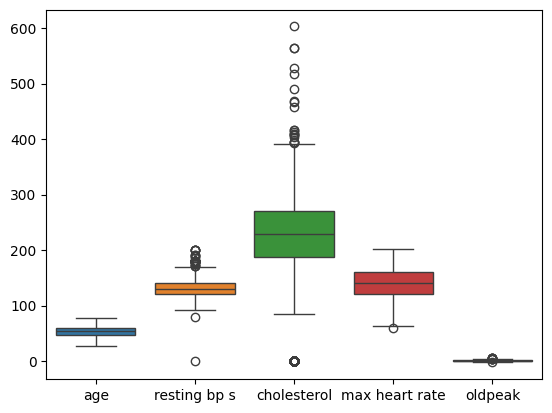

In [37]:
sns.boxplot(data=heart_df10[['age','resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']])
plt.show()

# Remove Outliers

In [38]:
from scipy import stats

cols = ["resting bp s", "cholesterol", "oldpeak"]

heart_df10 = heart_df10[(np.abs(stats.zscore(heart_df10[cols])) < 3).all(axis=1)]

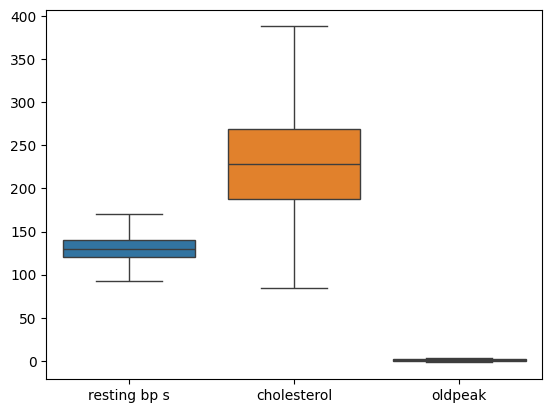

In [39]:
sns.boxplot(data=heart_df10[cols], showfliers=False)
plt.show()

# Define x and Y

In [40]:
x = heart_df10.drop('target',axis = 1)
y = heart_df10['target']

class_counts = pd.Series(y).value_counts()

print("Class Distribution:")
print(class_counts)

# Percentage distribution
print("\nPercentage Distribution:")
print(class_counts / len(y) * 100)

Class Distribution:
target
1    608
0    556
Name: count, dtype: int64

Percentage Distribution:
target
1    52.233677
0    47.766323
Name: count, dtype: float64


# Scalling Heart Data

In [41]:
Scalar = StandardScaler()
x_scaled = Scalar.fit_transform(x)
x_scaled

array([[-1.45817172,  0.48756686,  0.80932809, ..., -0.97790721,
        -0.02932312,  1.10707787],
       [-0.49935883,  1.66087225, -0.29295529, ...,  1.0225919 ,
        -0.02932312, -0.90327883],
       [-1.77777602, -0.09908584,  0.74865194, ..., -0.97790721,
        -0.02932312,  1.10707787],
       ...,
       [ 0.35291929, -0.09908584, -0.78847718, ...,  1.0225919 ,
        -0.02932312, -0.90327883],
       [ 0.35291929, -0.09908584,  0.27335544, ...,  1.0225919 ,
        -0.02932312, -0.90327883],
       [-1.67124125,  0.37023632, -0.34351875, ..., -0.97790721,
        -0.02932312,  1.10707787]], shape=(1164, 23))

# Train Model Using Train_test_split method

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42,stratify=y)

x_train

array([[ 0.99212789, -0.09908584,  1.00146923, ...,  1.0225919 ,
        -0.02932312, -0.90327883],
       [-0.6058936 , -0.45107746,  0.46549658, ..., -0.97790721,
        -0.02932312,  1.10707787],
       [-0.17975454, -0.568408  , -2.11323978, ..., -0.97790721,
        -0.02932312, -0.90327883],
       ...,
       [ 0.24638453, -0.21641638,  0.14189045, ..., -0.97790721,
        -0.02932312, -0.90327883],
       [-1.56470649, -0.68573854,  0.32391889, ..., -0.97790721,
        -0.02932312,  1.10707787],
       [-1.03203266, -0.68573854,  0.11155237, ..., -0.97790721,
        -0.02932312,  1.10707787]], shape=(814, 23))

In [43]:
x_test

array([[-0.49935883,  1.66087225, -0.29295529, ...,  1.0225919 ,
        -0.02932312, -0.90327883],
       [-0.17975454,  0.19424051, -2.11323978, ...,  1.0225919 ,
        -0.02932312, -0.90327883],
       [-1.35163696, -0.68573854,  1.2846246 , ...,  1.0225919 ,
        -0.02932312, -0.90327883],
       ...,
       [-0.17975454,  0.48756686, -1.10197062, ..., -0.97790721,
        -0.02932312,  1.10707787],
       [ 0.45945406,  2.24752495,  0.16211583, ...,  1.0225919 ,
        -0.02932312, -0.90327883],
       [ 1.20519742,  1.07421955,  0.16211583, ...,  1.0225919 ,
        -0.02932312, -0.90327883]], shape=(350, 23))

# Compare Model Accuracy with Graph

In [44]:
from sklearn.svm import SVC

model = {
    "LR":LogisticRegression(max_iter=1000,class_weight="balanced"),
    "DT":DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "RF":RandomForestClassifier(random_state=42, class_weight="balanced"),
    "GB":GradientBoostingClassifier(random_state=42),
    "SVM":SVC()
}
results = []
for name,model in model.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1] if hasattr(model,"predict_proba") else y_pred
    
    acc = accuracy_score(y_test,y_pred) * 100
    roc = roc_auc_score(y_test,y_prob) * 100
    results.append([name,acc,roc])


heart_graph_df = pd.DataFrame(results, columns=["Model", "Accuracy (%)", "ROC (%)"])
heart_graph_df

,Model,Accuracy (%),ROC (%)
0,LR,82.000000,90.314453
1,DT,86.000000,86.062302
2,RF,90.000000,96.585517
3,GB,87.142857,94.450443
4,SVM,83.714286,83.797978


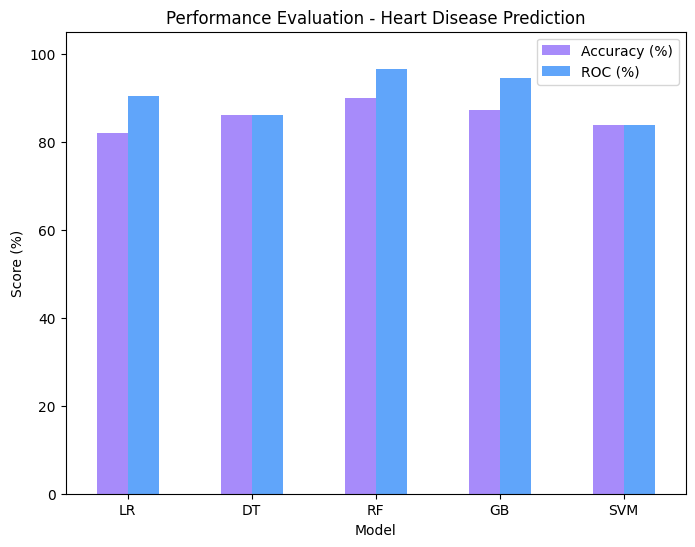

In [45]:
heart_graph_df.set_index("Model")[["Accuracy (%)","ROC (%)"]].plot(
    kind= "bar",
    figsize= (8,6),
    color=["#a78bfa", "#60a5fa"]
)

plt.title("Performance Evaluation - Heart Disease Prediction")
plt.ylabel("Score (%)")
plt.ylim(0, 105)
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.show()

# Confusion Matrix

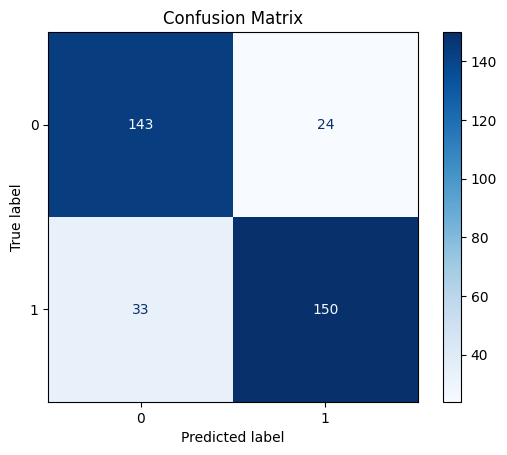

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) 
disp.plot(cmap="Blues") 
plt.title(f"Confusion Matrix") 
plt.show()

# Roc Curv Graph

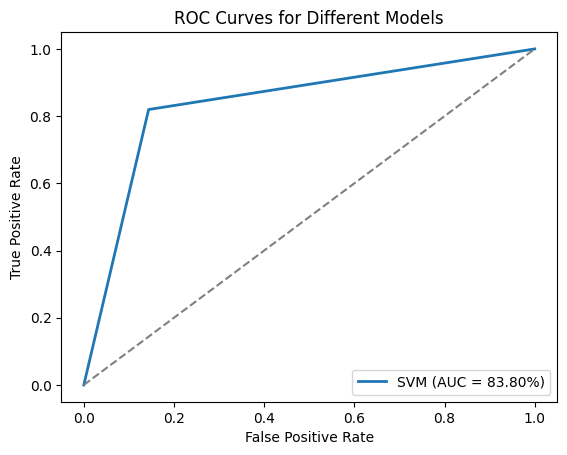

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc:.2f}%)")

# Plot settings
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend(loc="lower right")
plt.show()

# Final Model Prediction

In [48]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
model.score(x_test,y_test)

0.9142857142857143

In [50]:
model.predict(x_test)

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

# Test Few Model Properties

In [51]:
def predict_heart(
       age, resting_bp_s, cholesterol, max_heart_rate, oldpeak,
       Fasting_Blood_Sugar, Exercise_angina, Youngster,
       Adult, Senior_Citizen, Female, Male, Normal_ECG,
       Reduced_blood_supply, Thickened_left_ventricle,  Non_anginal_pain,
       Asymptomatic, Atypical_angina, Typical_angina, downsloping,
       flat, normal, upsloping
):
    input_heart_data = ([[age, resting_bp_s, cholesterol, max_heart_rate, oldpeak,
       Fasting_Blood_Sugar, Exercise_angina, Youngster,
       Adult, Senior_Citizen, Female, Male, Normal_ECG,
       Reduced_blood_supply, Thickened_left_ventricle,  Non_anginal_pain,
       Asymptomatic, Atypical_angina, Typical_angina, downsloping,
       flat, normal, upsloping]])
    

    heart_prediction = model.predict(input_heart_data)[0]

    if heart_prediction == 1:
        return "Heart Disease"
    else:
        return "No Heart Disease"

In [52]:
results = predict_heart(
    age = 40,resting_bp_s=140,cholesterol=289,max_heart_rate=172,oldpeak=0,Fasting_Blood_Sugar=0,
    Exercise_angina=0,Youngster=0,Adult=1,Senior_Citizen=0,Male=1,Female=0,Normal_ECG=1,
    Reduced_blood_supply=0,Thickened_left_ventricle=0,Non_anginal_pain=0,Asymptomatic=0,
    Atypical_angina=1,Typical_angina=0,downsloping=0,flat=0,normal=0,upsloping=1

)

print("Prediction : ",results)

Prediction :  No Heart Disease


In [53]:
results = predict_heart(
    age = 49,resting_bp_s=160,cholesterol=180,max_heart_rate=156,oldpeak=1,Fasting_Blood_Sugar=0,
    Exercise_angina=0,Youngster=0,Adult=1,Senior_Citizen=0,Male=0,Female=1,Normal_ECG=1,
    Reduced_blood_supply=0,Thickened_left_ventricle=0,Non_anginal_pain=1,Asymptomatic=0,
    Atypical_angina=0,Typical_angina=0,downsloping=0,flat=1,normal=0,upsloping=0
)

print("Prediction :",results)

Prediction : Heart Disease


# Export The Model Using Pickle

In [54]:
import pickle
import json

with open('heart_diseases_model.pickle','wb') as f:
    pickle.dump(model,f)

In [55]:
columns = {
    'heart_data_columns' : [col.lower() for col in x.columns]
}
with open('heart_diseases.json','w') as f:
    f.write(json.dumps(columns))